In [11]:
data_folder = r"radius1"
output_folder = r"radius1a"
output_image_filename = r"ultrasound"
output_segmentation_filename = r"segmentation"

output_image_size = 128

input_intensity_scaling = 1/255.0

In [3]:
import os

from local_vars import root_folder

data_fullpath = os.path.join(root_folder, data_folder)

image_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('ultrasound.png')]
segmentation_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('segmentation.png')]

num_images = len(image_file_list)
num_segmentations = len(segmentation_file_list)

print( "Found {} image files".format(num_images))
print( "Found {} segmentations".format(num_segmentations))

Found 2676 image files
Found 2676 segmentations


In [16]:
import cv2
import numpy as np

from ipywidgets import IntProgress
from IPython.display import display

image_data = np.zeros([num_images, output_image_size, output_image_size, 1]).astype(np.float16)
segmentation_data = np.zeros([num_images, output_image_size, output_image_size, 1]).astype(np.uint8)

f = IntProgress(min=0, max=num_images)
print("Reading files and saving them as numpy arrays...")
display(f)

for i in range(num_images):
    f.value = i
    current_file_name = image_file_list[i]
    current_file_fullname = os.path.join(data_fullpath, current_file_name)
    current_segmentation_name = segmentation_file_list[i]
    current_segmentation_fullname = os.path.join(data_fullpath, current_segmentation_name)
    image = cv2.imread(current_file_fullname, 0)
    segmentation = cv2.imread(current_segmentation_fullname, 0)
    if image is None:
        print("File not read: {}".format(current_file_fullname))
        break
    if segmentation is None:
        print("File not read: {}".format(current_segmentation_fullname))
        break
    if image.shape[0] != output_image_size or image.shape[1] != output_image_size:
        image_data[i,...,0] = cv2.resize(image, (output_image_size, output_image_size)).astype(np.float16) * input_intensity_scaling
        segmentation_data[i,...,0] = cv2.resize(segmentation, (output_image_size, output_image_size))
    else:
        image_data[i,...,0] = image.astype(np.float16) * input_intensity_scaling
        segmentation_data[i,...,0] = segmentation[...]

print("Images converted to numpy arrays")

Reading files and saving them as numpy arrays...


IntProgress(value=0, max=2676)

Images converted to numpy arrays


Showing image #1338 of 2676


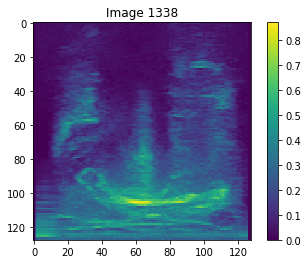

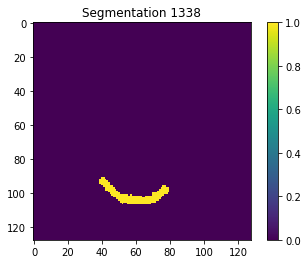

In [15]:
import matplotlib.pyplot as plt

image_index = num_images // 2
print("Showing image #{} of {}".format(image_index, num_images))

plt.imshow(image_data[image_index, :, :, 0].astype(np.float32))
plt.colorbar()
plt.title("Image " + str(image_index))
plt.show()

plt.imshow(segmentation_data[image_index, :, :, 0].astype(np.float32))
plt.colorbar()
plt.title("Segmentation " + str(image_index))
plt.show()



In [17]:
output_fullpath = os.path.join(root_folder, output_folder)

if not os.path.exists(output_fullpath):
    os.makedirs(output_fullpath)
    print("Created folder: " + output_fullpath)

output_image_fullname = os.path.join(output_fullpath, output_image_filename)
output_segmentation_fullname = os.path.join(output_fullpath, output_segmentation_filename)

print("Saving images to:         {}".format(output_image_fullname))
print("Saving segmentations to:  {}".format(output_segmentation_fullname))

np.save(output_image_fullname, image_data)
np.save(output_segmentation_fullname, segmentation_data)

Created folder: j:\Temp\radius1a
Saving images to:         j:\Temp\radius1a\ultrasound
Saving segmentations to:  j:\Temp\radius1a\segmentation
